In [22]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import axispi as axp

1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

**The Differential Cross Section**

The differential cross section expresses the probability that an event happens at each possible scattering angle $\theta$.
According to <a href="http://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf">this paper</a>
the differential cross section for the scattering of the $e^+ + e^- \to \mu^+ + \mu^-$, with $\sqrt{s} \sim 2 m_\mu$  in the center-of-mass energy frame is
\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
\end{equation}

The differential cross section can be expressed as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right]$$


We can calculate the total cross section where the total energy $$(\sqrt s) = E{tot}$$ is taken as a parameter by integrating this expression.

$$ \sigma (\sqrt s) = \int_0^{\pi} d\theta sin\theta \int_0^{2\pi} d\phi \frac{d\sigma}{d\Omega} =  4\pi\frac{\alpha^2}{3s^3}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}(2m_e^2+s)(2m_\mu^2+s) $$ 
 $\alpha$ is a constant the fine_structure constant. 

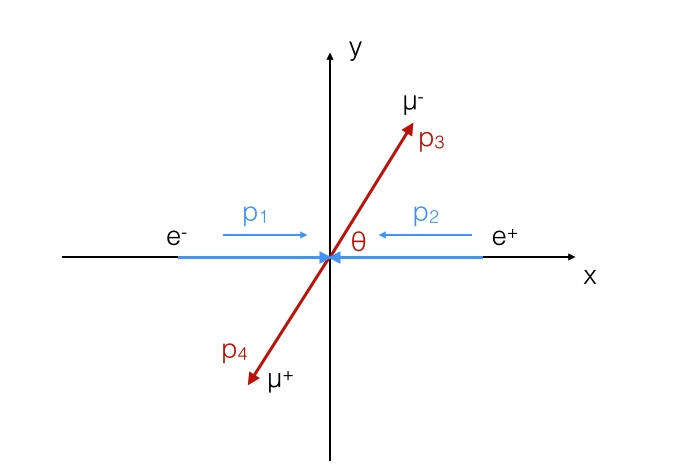

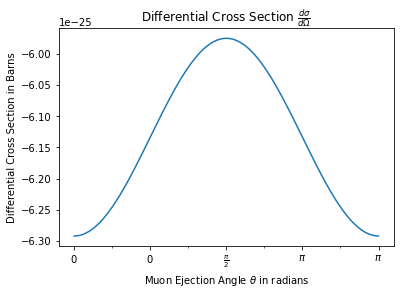

In [58]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import axispi as axp

e = 1.602176634 * 1e-19 #C
m_muon = 105.6583755 #MeV
m_e = 0.510998 #Mev

mu2 = m_muon**2 #Mev^2
me2 = m_e**2 #Mev^2
s = 4*mu2 + 5000 #MeV^2
alpha = 0.007297352 #no unit of measurement


#conversion factor
con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns

def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = e*4/(64 * math.pi*2 * s)
    c2 = c1 * cu*(1/2) * ce*(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

def dcs(theta,s):#differential cross section with simplification 
    a,b = ab(s)
    return a+b*np.cos(theta)**2
def d_sigma(s,theta): #differential cross section without simplification
    #print("The differential cross section is", d_sigma)
    d_sigma = (alpha**2/(4*s))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(1+(4/s)*(m_e**2+m_muon**2)+(1-(4*m_e**2)/s)*(1-(4*m_muon**2)/s)*np.cos(theta)**2)
    return d_sigma
def sigma(s):
    #print("The total cross section is ", s)
    sigma = 4*np.pi*(alpha**2/(3*s**3))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(2*m_e**2+s)*(2*m_muon**2+s)
    return s



##Plotting the differential cross section in CoM
res = 1000 #number of points plotted. Resolution of graph
theta = np.linspace(0,np.pi,res)
DCS = [dcs(th,s)/con1 for th in theta] #barns


figDCS, ax = plt.subplots()
ax.plot(theta,DCS)
ax.set_title(r'Differential Cross Section $\frac{d\sigma}{d \Omega}$')
ax.set_xlabel(r'Muon Ejection Angle $\theta$ in radians')
ax.set_ylabel('Differential Cross Section in Barns')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(axp.multiple_formatter()))


2. Compute and display the angle and momentum components distributions of the emerging muon pairs;

By normalizing the differential cross section we can get the angular distribution 
$$ P(\theta) = \frac{1}{\sigma} \frac{d\sigma}{d\Omega}$$ 
$$ P(\Omega) = \int_0^{2\pi} \frac{1}{\sigma} \frac{d\sigma}{d\Omega}  sin\theta  d\phi =  \frac{2 \pi sin\theta}{\sigma} \frac{d\sigma}{d\Omega}$$

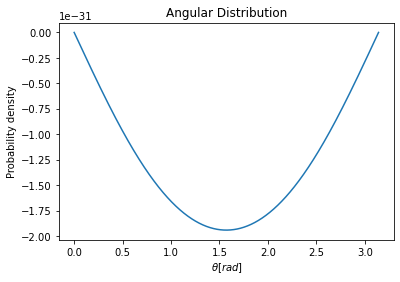

In [69]:
def pdf(theta, s): #probabily density for anglular distribution
    return 2* np.pi * np.sin(theta) * dcs(theta,s)/sigma(s)



plt.plot(theta, pdf(theta,s))
plt.title("Angular Distribution")
plt.xlabel(r'$\theta[rad]$' )
plt.ylabel(r'Probability density' )
plt.show()
#something wrong here
